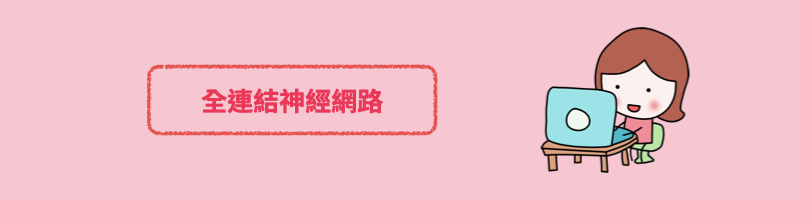

###導入必要套件

In [1]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD

###讀入 Fasion 版的 MNIST

In [3]:
 from tensorflow.keras.datasets import fashion_mnist
 (x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 1s 0us/step


###資料整理

In [4]:
x_train = x_train.reshape(60000, 784)/255
x_test = x_test.reshape(10000, 784)/255

In [5]:
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

###打造神經網路

####建構三層神經網路

In [6]:
#增加層數與神經元數量

#建立空白的神經網路
model = Sequential()

#輸入層
model.add(Dense(372, input_dim=784, activation='relu'))

#第一隱藏層
model.add(Dense(263, activation='relu'))

#第二隱藏層
model.add(Dense(149, activation='relu'))

#第三隱藏層
model.add(Dense(32, activation='relu'))

#輸出層
model.add(Dense(10, activation='softmax'))

#### 組裝神經網路

In [7]:
model.compile(loss='categorical_crossentropy', optimizer='nadam', metrics=['accuracy'])

#實驗結果發現損失函數(loss)改成categorical_crossentropy、優化器(optimizer)改成nadam準確度會提高

#### 神經網路架構

In [8]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 372)               292020    
                                                                 
 dense_1 (Dense)             (None, 263)               98099     
                                                                 
 dense_2 (Dense)             (None, 149)               39336     
                                                                 
 dense_3 (Dense)             (None, 32)                4800      
                                                                 
 dense_4 (Dense)             (None, 10)                330       
                                                                 
Total params: 434585 (1.66 MB)
Trainable params: 434585 (1.66 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


### 訓練神經網路模型

In [9]:
model.fit(x_train, y_train, batch_size=70, epochs=30)  #學習30次

Epoch 1/30
858/858 [==============================] - 14s 5ms/step - loss: 0.4722 - accuracy: 0.8310
Epoch 2/30
858/858 [==============================] - 4s 5ms/step - loss: 0.3503 - accuracy: 0.8730
Epoch 3/30
858/858 [==============================] - 4s 5ms/step - loss: 0.3121 - accuracy: 0.8850
Epoch 4/30
858/858 [==============================] - 4s 5ms/step - loss: 0.2924 - accuracy: 0.8911
Epoch 5/30
858/858 [==============================] - 5s 5ms/step - loss: 0.2758 - accuracy: 0.8964
Epoch 6/30
858/858 [==============================] - 4s 5ms/step - loss: 0.2623 - accuracy: 0.9014
Epoch 7/30
858/858 [==============================] - 4s 5ms/step - loss: 0.2498 - accuracy: 0.9054
Epoch 8/30
858/858 [==============================] - 4s 5ms/step - loss: 0.2400 - accuracy: 0.9092
Epoch 9/30
858/858 [==============================] - 4s 5ms/step - loss: 0.2276 - accuracy: 0.9138
Epoch 10/30
858/858 [==============================] - 4s 5ms/step - loss: 0.2182 - accuracy: 0.917

###測試結果

####一般模式

In [10]:
y_predict = model.predict(x_test)

class_names = [
    "T恤/上衣", "褲子", "套頭毛衣", "洋裝", "外套",
    "涼鞋", "襯衫", "運動鞋", "包包", "短靴"
]

313/313 [==============================] - 1s 2ms/step


神經網路預測是: 包包


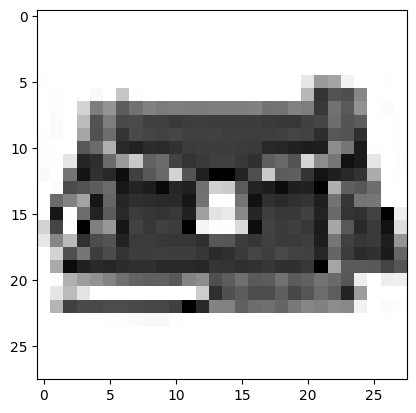

In [11]:
#可自行調整n值(0-9999)
n = 95

# 獲得預測的類別索引
predicted_class_index = np.argmax(y_predict[n])

# 獲得預測的類別名稱
predicted_class_name = class_names[predicted_class_index]

print('神經網路預測是:', predicted_class_name)

# 顯示圖像
plt.imshow(x_test[n].reshape(28, 28), cmap='Greys')

####互動模式

In [12]:
from ipywidgets import interact_manual

In [13]:
def test(測試編號):
    predicted_class_index_interact = np.argmax(y_predict[測試編號])
    predicted_class_name_interact = class_names[predicted_class_index_interact]
    plt.imshow(x_test[測試編號].reshape(28,28), cmap='Greys')
    print('神經網路預測是:', predicted_class_name_interact)


interactive(children=(IntSlider(value=4999, description='測試編號', max=9999), Button(description='Run Interact', …

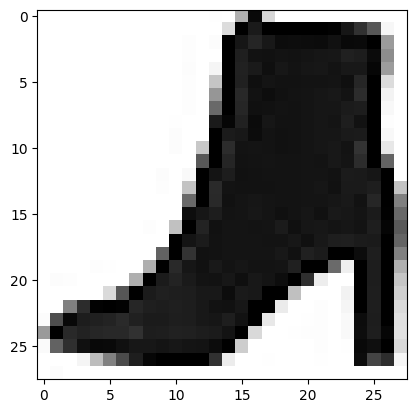

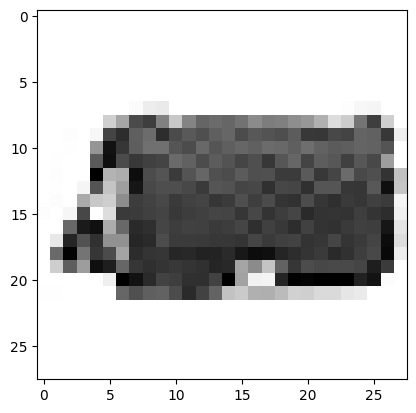

In [14]:
interact_manual(test, 測試編號=(0, 9999));  #跑不止一次時圖片會接續在下方顯示，不會覆蓋前幾次的圖

###神經網路「總評量」

In [15]:
score = model.evaluate(x_test, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.4761 - accuracy: 0.8851


In [16]:
print('loss:', score[0])
print('正確率', score[1])

loss: 0.4761263132095337
正確率 0.8851000070571899
